# Tutorial 5

## Question 1

The (approximate) orbit of a planet around the sun is given by the following equations:

$$x = d\cos(2\pi t/p)\\
 y = d\sin(2\pi t/p)$$
 
where $d$ is the distance from the sun, and $p$  is the orbital period in days.
 
Values for $d$ and $p$ for the Solar System can be found in the following link:

http://www.astronomynotes.com/tables/tablesb.htm

:::{sidebar} Animation Code
```
from matplotlib import animation
from IPython.display import HTML, display
import random

# Parabolic Trajectory

t = np.arange(10)
y = 25 - (t-5)**2

# Animation code:

filename = "animation.gif"
frames = len(t)
interval = 100

def ganimate(frame):
    plt.cla()
    plt.scatter(t[frame], y[frame])
    plt.xlim(0, 10)
    plt.ylim(0, 30)
    
fig = plt.figure(figsize=(5, 5))
anim = animation.FuncAnimation(fig, ganimate, frames=frames, interval=interval)
anim.save(filename, writer='imagemagick')
plt.close()

__counter__ = str(random.randint(0,2e9))
display(HTML('<img src="' + filename + '?' + __counter__ + '">'))
```
:::
 
1. Calculate the trajectory of planet Earth's orbit around the sun for one (Earth) year. Plot a graph showing $x$ and $y$ against $t$, and  another graph showing $y$ against $x$.
1. Calculate the trajectories of the four innermost planets around the sun, and add their trajectories to the graphs (or course you'll have to increase the simulation duration). [hint: you could create separate variables `x_earth`, `y_earth`, `x_mercury`, `y_mercury` etc, but it is neater to make two 2-dimensional arrays `x` and `y` where each row corresponds to a planet].
1. Adapt the animation code to generate an animation of the orbits of the four planets. [Hit: Generating the animation is slow, so try reducing the number of ]

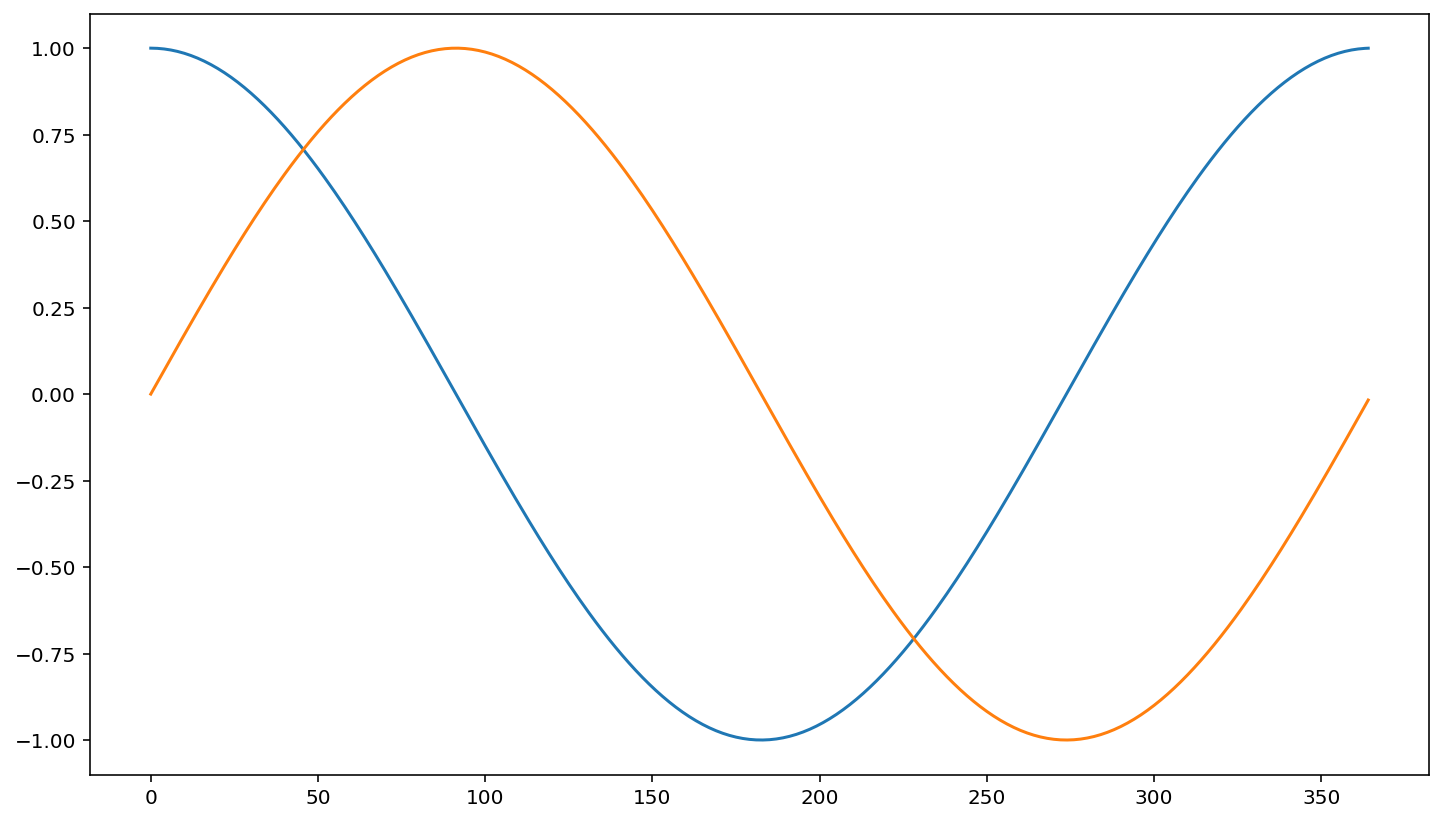

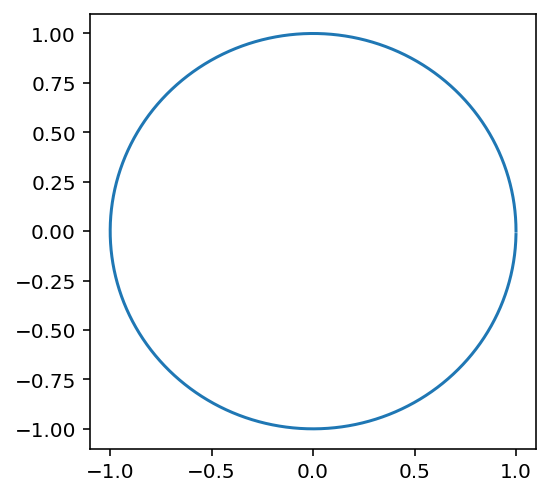

In [2]:
# 1

import numpy as np
import matplotlib.pyplot as plt

p = 365
d = 1
t = np.arange(0, 365)
x = d * np.cos(2*np.pi*t/p)
y = d * np.sin(2*np.pi*t/p)

plt.plot(t, x)
plt.plot(t, y)

plt.figure(figsize=(4,4))
plt.plot(x, y)

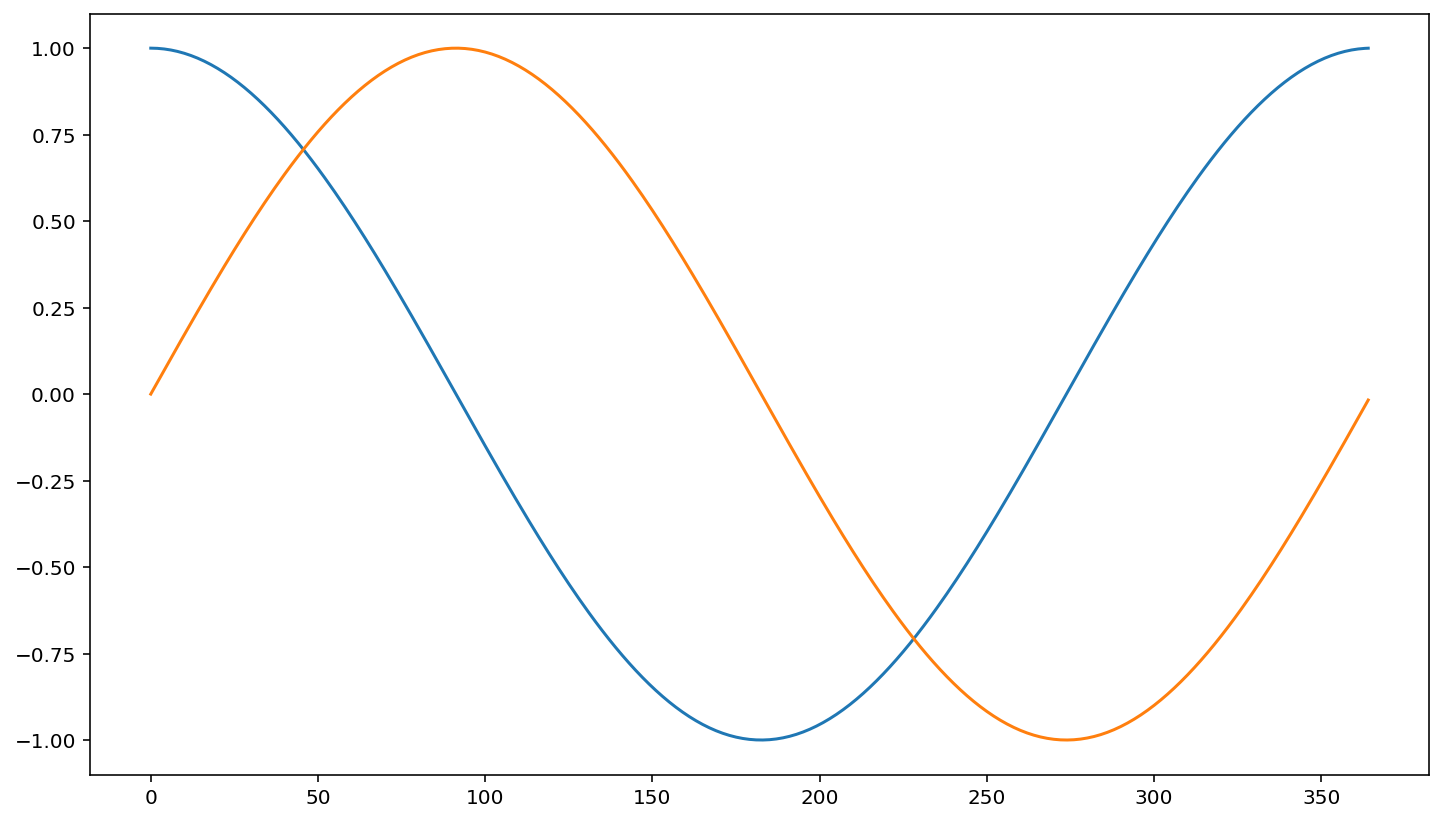

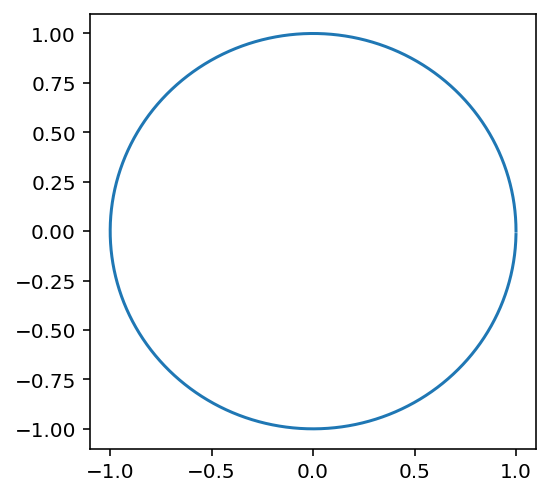

In [4]:
# 2

p = 365
d = 1
t = np.arange(0, 365)
x = d * np.cos(2*np.pi*t/p)
y = d * np.sin(2*np.pi*t/p)

plt.plot(t, x)
plt.plot(t, y)


plt.figure(figsize=(4,4))
plt.plot(x, y)




The spread of an infectious disease amongst a population can be modelled by the SIR model. The number of susceptible ($S_i$) and infected ($I_i$) peeople are modelled by the following pair of coupled equations:

$$ S_{i+1} = S_i - bS_iI_i $$
$$ I_{i+1} = I_i + bS_iI_i - aI_i $$

where $i$ represents the number of days since the start of the outbreak. There are two parameters: the recovery rate parameter $a$ and the infection rate parameter $b$.

1. With parameter values $a = 0.1$ and $b = 0.00005$ and the initial populations $S_0 = 20000$ and $I_0 = 100$, simulate the infection for a duration 100 days. Plot the resulting arrays `S` and `I` on the same figure. [You should see that the number of infected people peaks at around 15000 at about day 15, while the number of susceptible people drops to about zero at about the same time].

The number of recovered people $R_i$ is given by $P = S_i + I_i + R_i$ where the total population $P$ is a constant.

2. Given the total population $P = S_0 + I_0$, calculate an array `R` representing the number of recovered people over the 100 days. Plot `R` on the graph together with `S` and `I`.

The infection rate parameter $b$ can be influenced by public policy - for example the imposition of social distancing, vaccination or other measures. 

3. Experiment with various values of $b$ to see how it affects the outbreak. Roughly what is the minimum value of $b$ which results in an epidemic? (We say there is an epidemic if $I_i$ initially rises to a peak, however small).

The Government would like to understand how $b$ affects the the peak value of $I_i$. 

4. Write a function `max_I(a, b)` which runs the simulation with the given values for the parameters $a$ and $b$ and returns the maximum value of `I_i`. Then, write a loop which calculates `max_I(a, b)` for values of `b` ranging from 0.0 to 0.00005. Plot a graph showing peak $I_i$ against $b$.

```
def max_I(a, b):
    
    # run the simulation for parameter values a, b
    
    # return maximum value of I
```

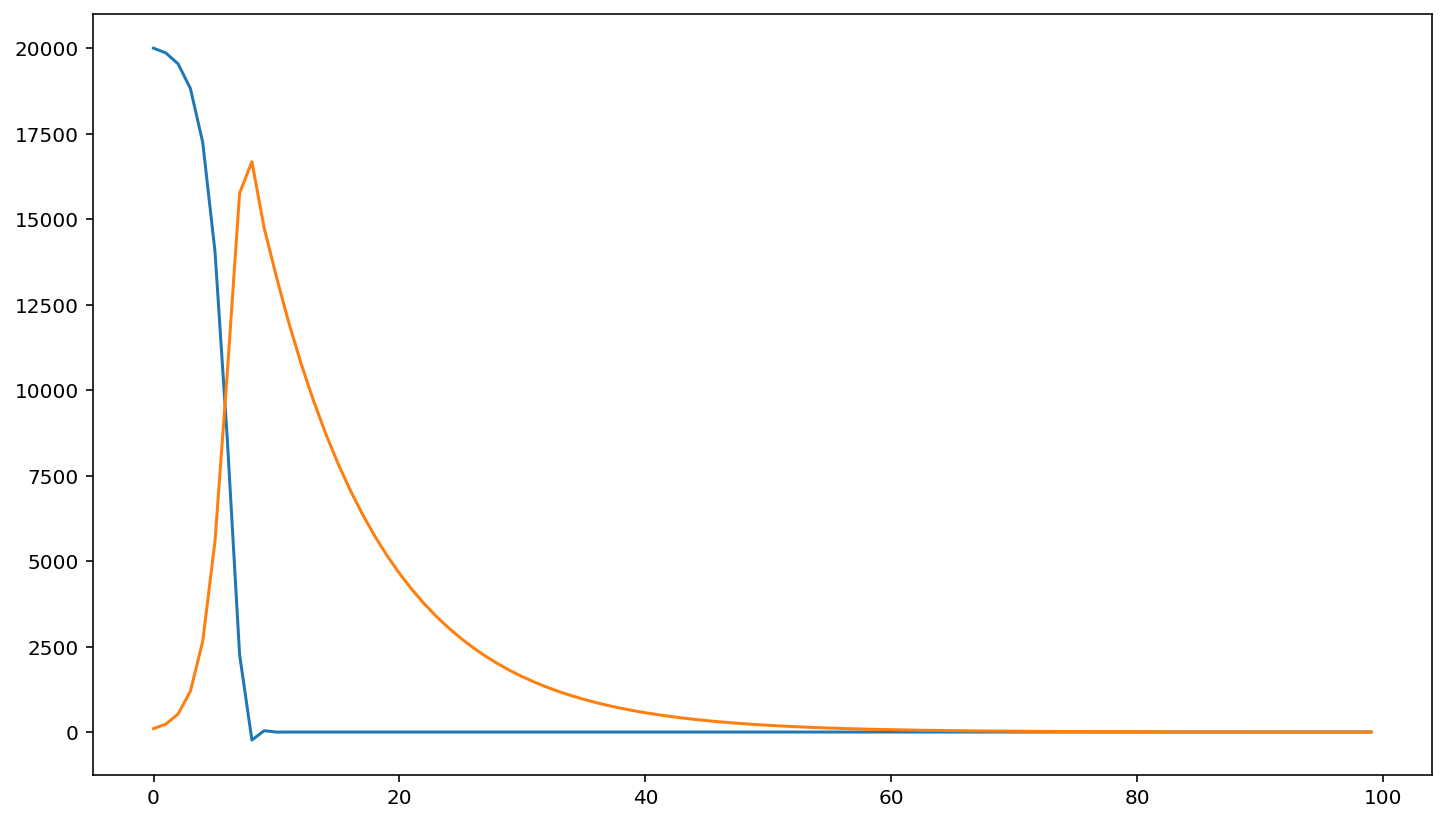

In [43]:
import numpy as np
import matplotlib.pyplot as plt



for i in range(t_max - 1):
    S[i+1] = S[i] - b * S[i] * I[i]
    I[i+1] = I[i] + b * S[i] * I[i] - a * I[i]
    
Ra = S_0 + I_0 - S - I
    
plt.plot(t, S)
plt.plot(t, I)

In [58]:
def max_I(a, b):
    
    t_max = 100
    S_0 = 20000
    I_0 = 100
    t = np.arange(t_max)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)

    S[0] = S_0
    I[0] = I_0
    for i in range(t_max - 1):
        S[i+1] = S[i] - b * S[i] * I[i]
        I[i+1] = I[i] + b * S[i] * I[i] - a * I[i]
    
    return np.max(I)


max_I(0.1, 0.00005)

14873.5610390745

In [83]:
n = 100
b_vals = np.linspace(0, 0.00006, n)
b_vals

array([0.00000000e+00, 6.06060606e-07, 1.21212121e-06, 1.81818182e-06,
       2.42424242e-06, 3.03030303e-06, 3.63636364e-06, 4.24242424e-06,
       4.84848485e-06, 5.45454545e-06, 6.06060606e-06, 6.66666667e-06,
       7.27272727e-06, 7.87878788e-06, 8.48484848e-06, 9.09090909e-06,
       9.69696970e-06, 1.03030303e-05, 1.09090909e-05, 1.15151515e-05,
       1.21212121e-05, 1.27272727e-05, 1.33333333e-05, 1.39393939e-05,
       1.45454545e-05, 1.51515152e-05, 1.57575758e-05, 1.63636364e-05,
       1.69696970e-05, 1.75757576e-05, 1.81818182e-05, 1.87878788e-05,
       1.93939394e-05, 2.00000000e-05, 2.06060606e-05, 2.12121212e-05,
       2.18181818e-05, 2.24242424e-05, 2.30303030e-05, 2.36363636e-05,
       2.42424242e-05, 2.48484848e-05, 2.54545455e-05, 2.60606061e-05,
       2.66666667e-05, 2.72727273e-05, 2.78787879e-05, 2.84848485e-05,
       2.90909091e-05, 2.96969697e-05, 3.03030303e-05, 3.09090909e-05,
       3.15151515e-05, 3.21212121e-05, 3.27272727e-05, 3.33333333e-05,
      

In [84]:
peak_I = np.zeros(n)

for i in range(n):
    b = b_vals[i]
    peak_I[i] = max_I(a, b)
    
peak_I

array([  100.        ,   100.        ,   100.        ,   100.        ,
         100.        ,   100.        ,   100.        ,   100.        ,
         100.        ,   170.93458449,   414.33841644,   792.90614464,
        1213.87364878,  1662.18776303,  2119.98716215,  2577.08938258,
        3025.55285586,  3462.88882212,  3885.84027034,  4292.98419294,
        4688.28495483,  5062.75350781,  5426.01737762,  5773.23150906,
        6111.76119541,  6425.97084103,  6740.39549649,  7036.53753549,
        7319.44443509,  7592.48457515,  7857.05717632,  8112.32408279,
        8354.896514  ,  8578.4433711 ,  8813.57102946,  9039.64066918,
        9230.25940159,  9456.41354116,  9642.05106295,  9845.64697276,
       10017.72971045, 10214.84340469, 10355.96117578, 10561.3060704 ,
       10708.33609866, 10870.56140408, 11043.43822296, 11164.85412559,
       11325.10316294, 11487.74370716, 11604.1561051 , 11721.59171441,
       11893.74320281, 12023.50128675, 12113.56174005, 12233.00952243,
      

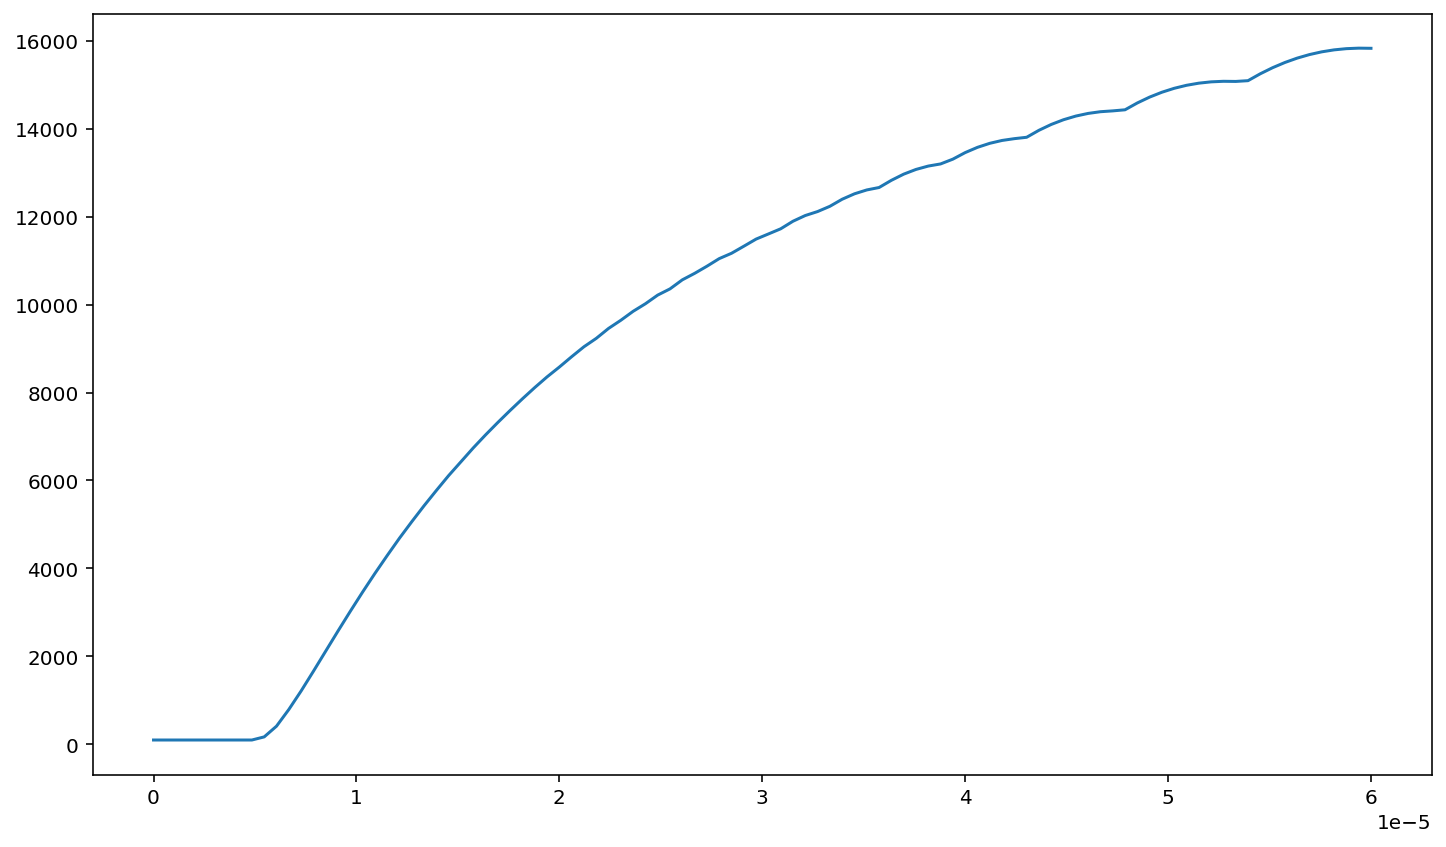

In [85]:
plt.plot(b_vals, peak_I)